# Основные концепции Machine Learning.

В рамках задачи регрессии нужно предсказать цену телефона, для классификации - операционную систему или год выпуска устройства. Для задачи кластеризации необходимо запустить алгоритм кластеризации, в котором количество кластеров и признаки можете выбрать на свое усмотрение.

In [26]:
### Тут нужно сделать импорты всех необходимых библиотек ###
import numpy as np
import pandas as pd

In [27]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc("font", size=18) # для увеличения шрифта подписей графиков

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
### Здесь требуется загрузить датасет phones.csv ###
phones = pd.read_csv(r"C:\Users\mmd28\OneDrive\Рабочий стол\Scripts\DS_ML\часть 1\1\1.8_phones.csv")

In [30]:
phones.head(7)

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013
5,512,iOS,15842,2018
6,128,Android,7191,2015


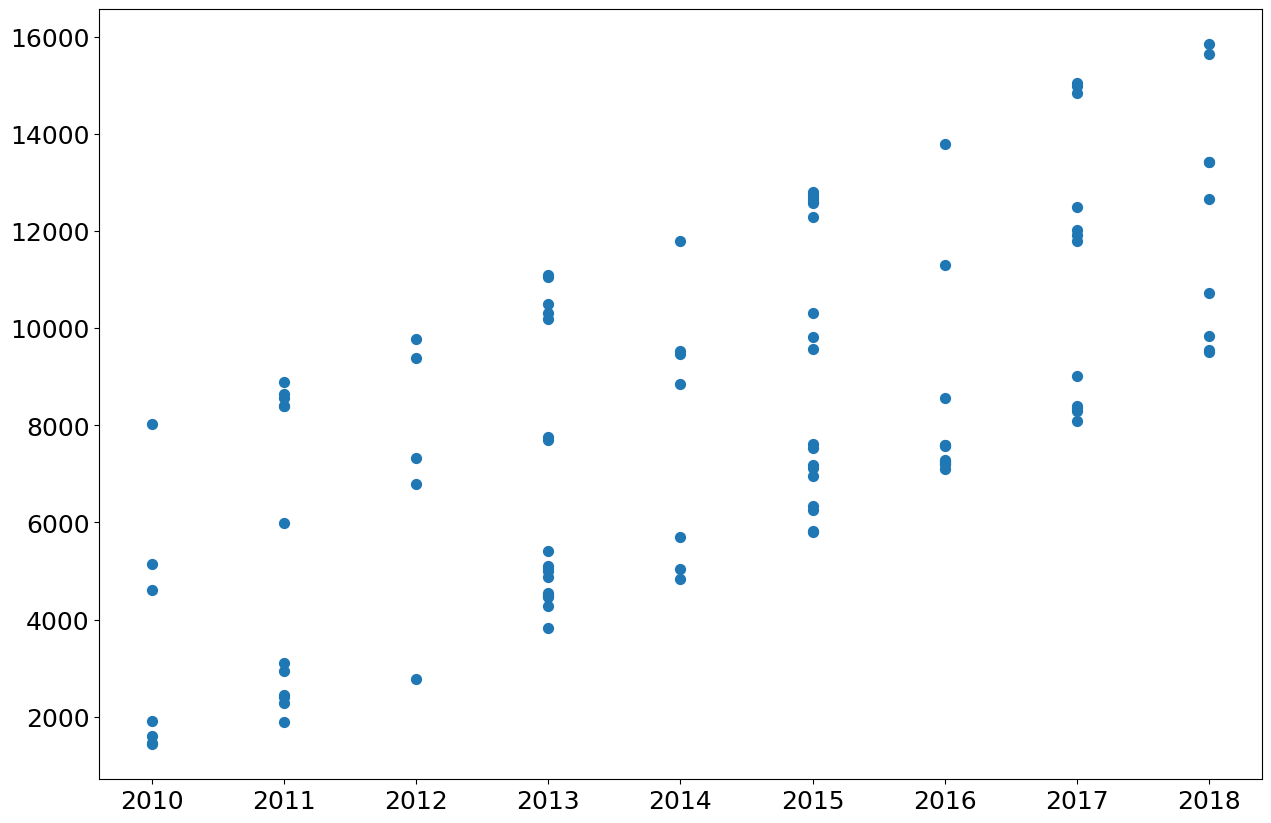

In [31]:
### Опционально: используя matplotlib, можно сделать визуализацию загруженного датасета ###
fig = plt.figure(figsize=(15, 10))
ax = plt.axes()

ax.scatter(phones['year'], phones['price'], s = 50)
plt.show()

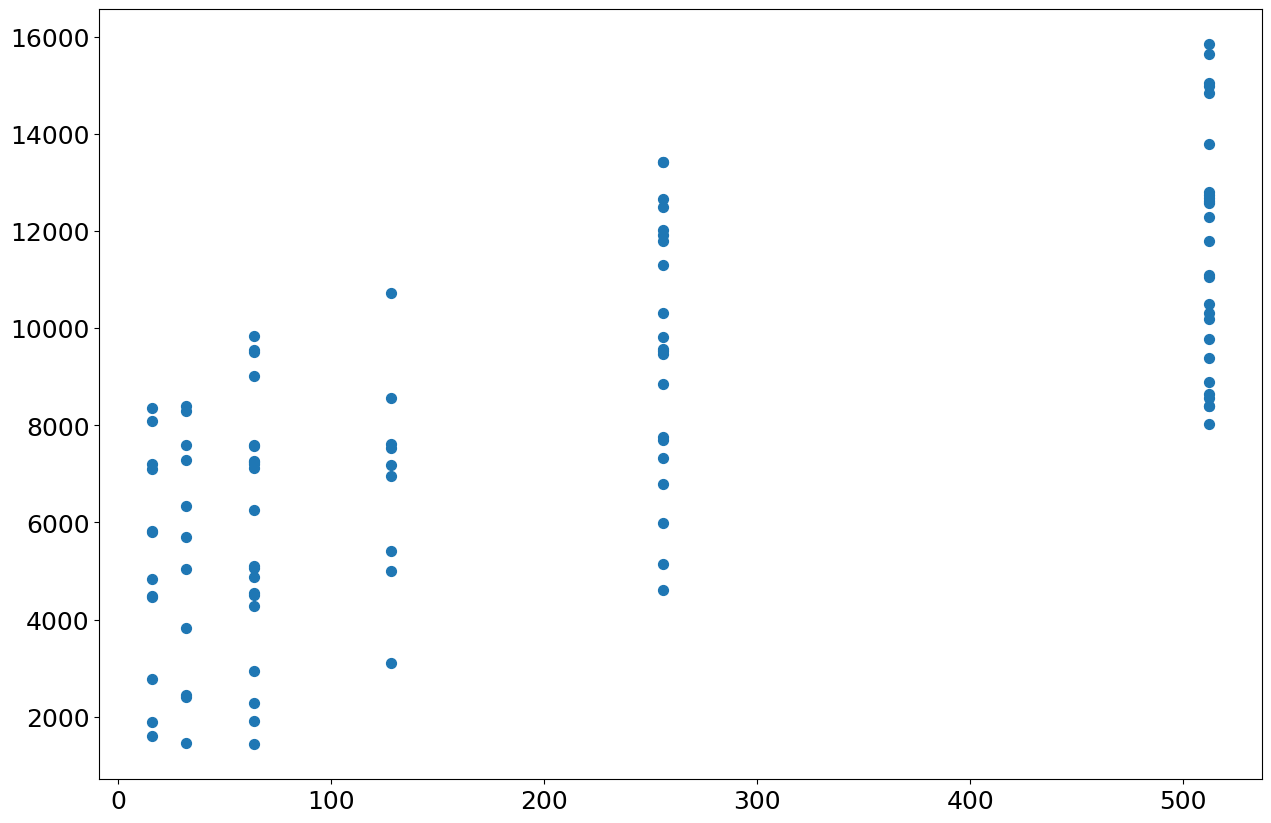

In [32]:
fig = plt.figure(figsize=(15, 10))
ax = plt.axes()

ax.scatter(phones['disk'], phones['price'], s = 50)
plt.show()

Задание 1: обучить модель регрессии

In [33]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = phones[['disk', 'year']]
y = phones['price']

In [34]:
### Здесь следует запустить процесс обучения ###
reg = LinearRegression().fit(X, y)
### и продемонстрировать работоспобность обученной модели ###

In [35]:
reg.predict(X[1:2])[0]

np.float64(7695.812232594937)

In [36]:
# вытаскиваем нужные коэффициенты
[b1, b2] = reg.coef_
a = reg.intercept_

# создаем функцию для предсказания цены дома без библиотеки
def reg_prediction(dim_1, dim_2):
    return a + b1 * dim_1 + b2 * dim_2

In [37]:
reg_prediction(X.disk[1], X.year[1])

np.float64(7695.812232594937)

In [38]:
# сделаем предсказания для различных конфигураций домов
d1, d2 = list(), list()
for x in np.linspace(min(phones["disk"]), max(phones["disk"]), 100):
    for y in np.linspace(min(phones["year"]), max(phones["year"]), 100):
        d1.append(x)
        d2.append(y)
d1 = np.array(d1).reshape(-1, 1)
d2 = np.array(d2).reshape(-1, 1)
p = reg.predict(np.concatenate([d1, d2], axis=1))

c:\Users\mmd28\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


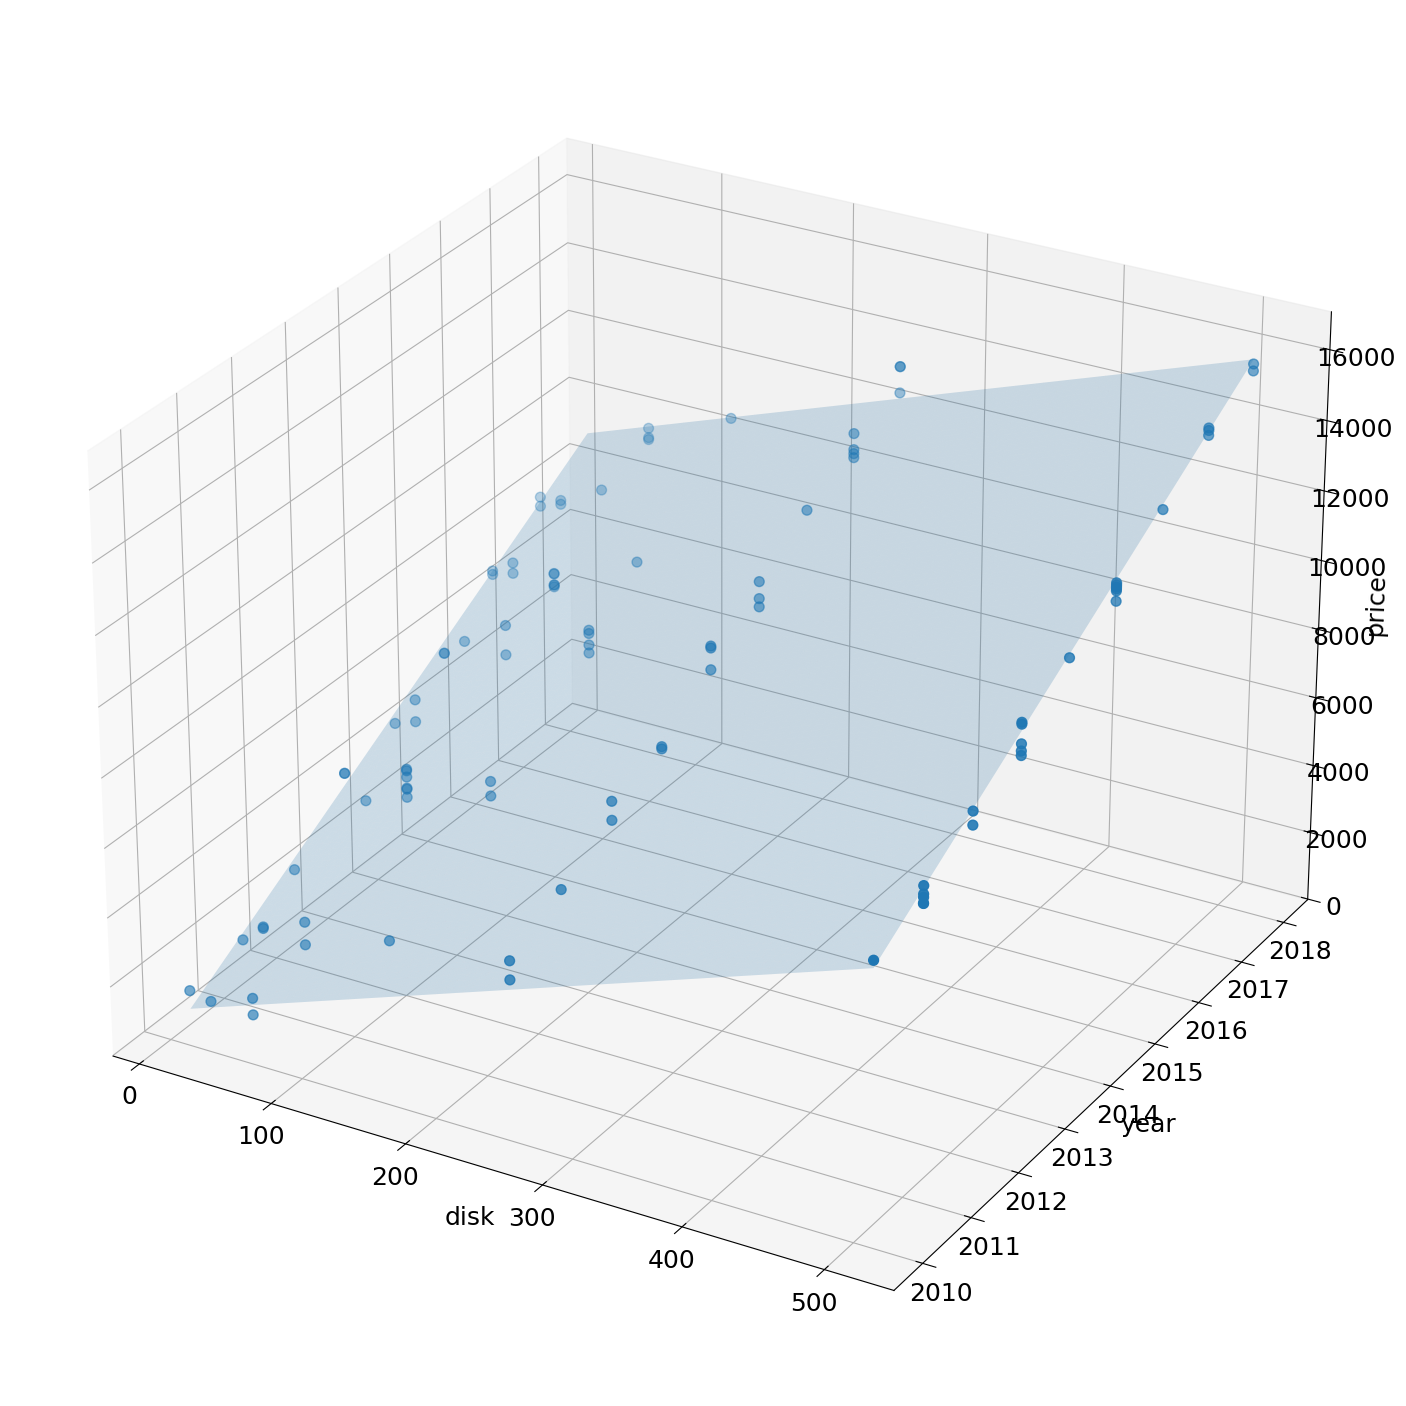

In [39]:
fig = plt.figure(figsize=(18, 18))
ax = plt.axes(projection='3d')

ax.scatter(phones['disk'], phones['year'], phones['price'], s = 50)
ax.plot_trisurf(d1.ravel(), d2.ravel(), p.ravel(), alpha=0.2)

ax.set_xlabel("disk")
ax.set_ylabel("year")
ax.set_zlabel("price")


# изменяем позицию камеры и отрисовываем картинку
ax.elev = 27
plt.show()

Задание 2: обучить модель классификации

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [41]:
phones.head(7)

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013
5,512,iOS,15842,2018
6,128,Android,7191,2015


In [42]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = phones[['disk', 'year']]
y = phones['os']

In [43]:
### Здесь следует запустить процесс обучения ###
cl = DecisionTreeClassifier().fit(X, y)
### и продемонстрировать работоспобность обученной модели ###
print(export_text(cl))

|--- feature_0 <= 192.00
|   |--- class: Android
|--- feature_0 >  192.00
|   |--- class: iOS



In [44]:
cl.predict(X[3:4])[0], y[3]

('iOS', 'iOS')

Задание 3: обучить модель кластеризации

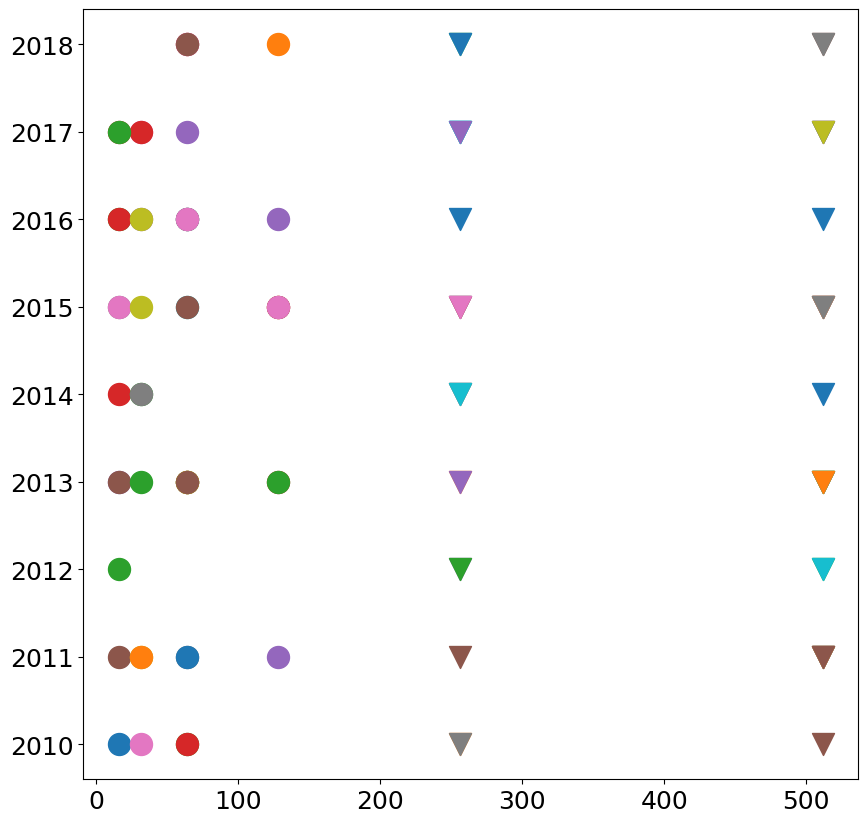

In [45]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку

markers = {"Android": "o", "iOS": "v"}
for d1, d2, l in zip(phones.disk, phones.year, phones.os):
    plt.scatter(d1, d2, s=250, marker=markers[l])

# отображаем картинку
plt.show()

In [46]:
from sklearn.cluster import KMeans

In [47]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = phones[['disk', 'year']]

In [48]:
### Здесь следует запустить процесс обучения ###
clust = KMeans(n_clusters=3).fit(X)
### и продемонстрировать работоспобность обученной модели ###

In [49]:
[c1, c2, c3] = clust.cluster_centers_
clust.cluster_centers_

array([[  57.35849057, 2014.24528302],
       [ 512.        , 2013.88461538],
       [ 256.        , 2014.57142857]])

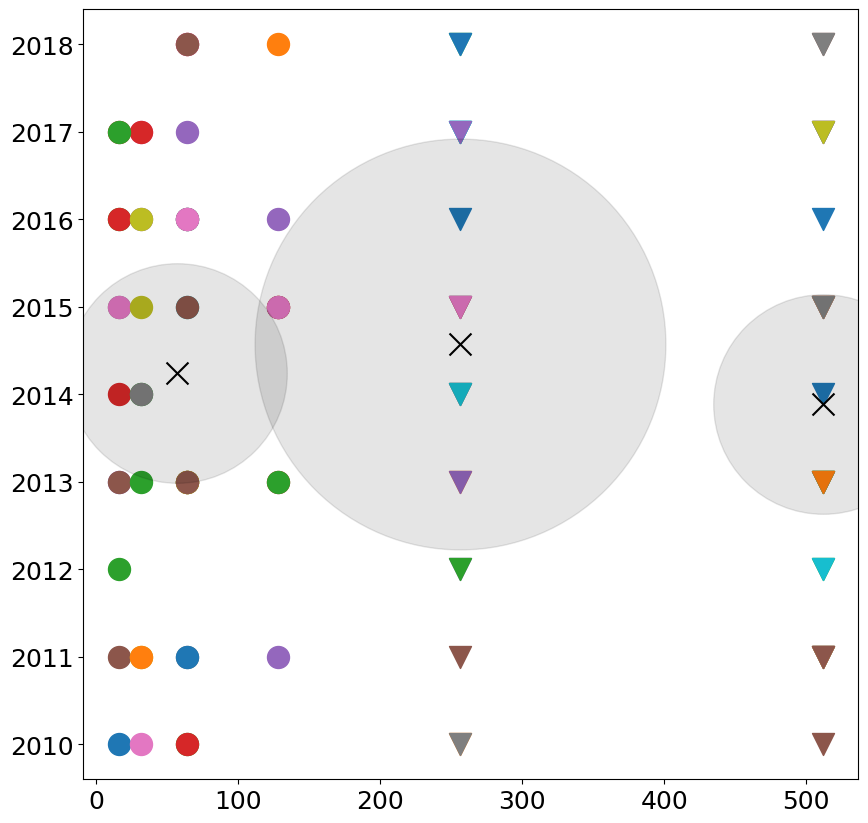

In [50]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку

markers = {"Android": "o", "iOS": "v"}
for d1, d2, l in zip(phones.disk, phones.year, phones.os):
    plt.scatter(d1, d2, s=250, marker=markers[l])

# добавляем информацию о центрах кластеров
plt.scatter(c1[0], c1[1], s=250, marker="x", c="black")
plt.scatter(c1[0], c1[1], s=250 * 1e2, c="black", alpha=0.1)

plt.scatter(c2[0], c2[1], s=250, marker="x", c="black")
plt.scatter(c2[0], c2[1], s=250 * 1e2, c="black", alpha=0.1)

plt.scatter(c3[0], c3[1], s=250, marker="x", c="black")
plt.scatter(c3[0], c3[1], s=250 * 3.5e2, c="black", alpha=0.1)

# отображаем картинку
plt.show()